# Figure 1
Map of study area and 2025 Los Angeles County wildfires included in the study

**Data Sources**

Los Angeles County boundary:
- https://geohub.lacity.org/
- https://hub.arcgis.com/api/v3/datasets/10f1e37c065347e693cf4e8ee753c09b_15/downloads/data?format=shp&spatialRefId=3857&where=1%3D1

California State boundary:
- https://data.ca.gov/dataset/ca-geographic-boundaries

Landsat 8: 
- https://earthexplorer.usgs.gov/

/var/folders/br/pyt6szbd2wb4q6n5wqkffrbc0000gn/T/ipykernel_23060/1696522063.py:120: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


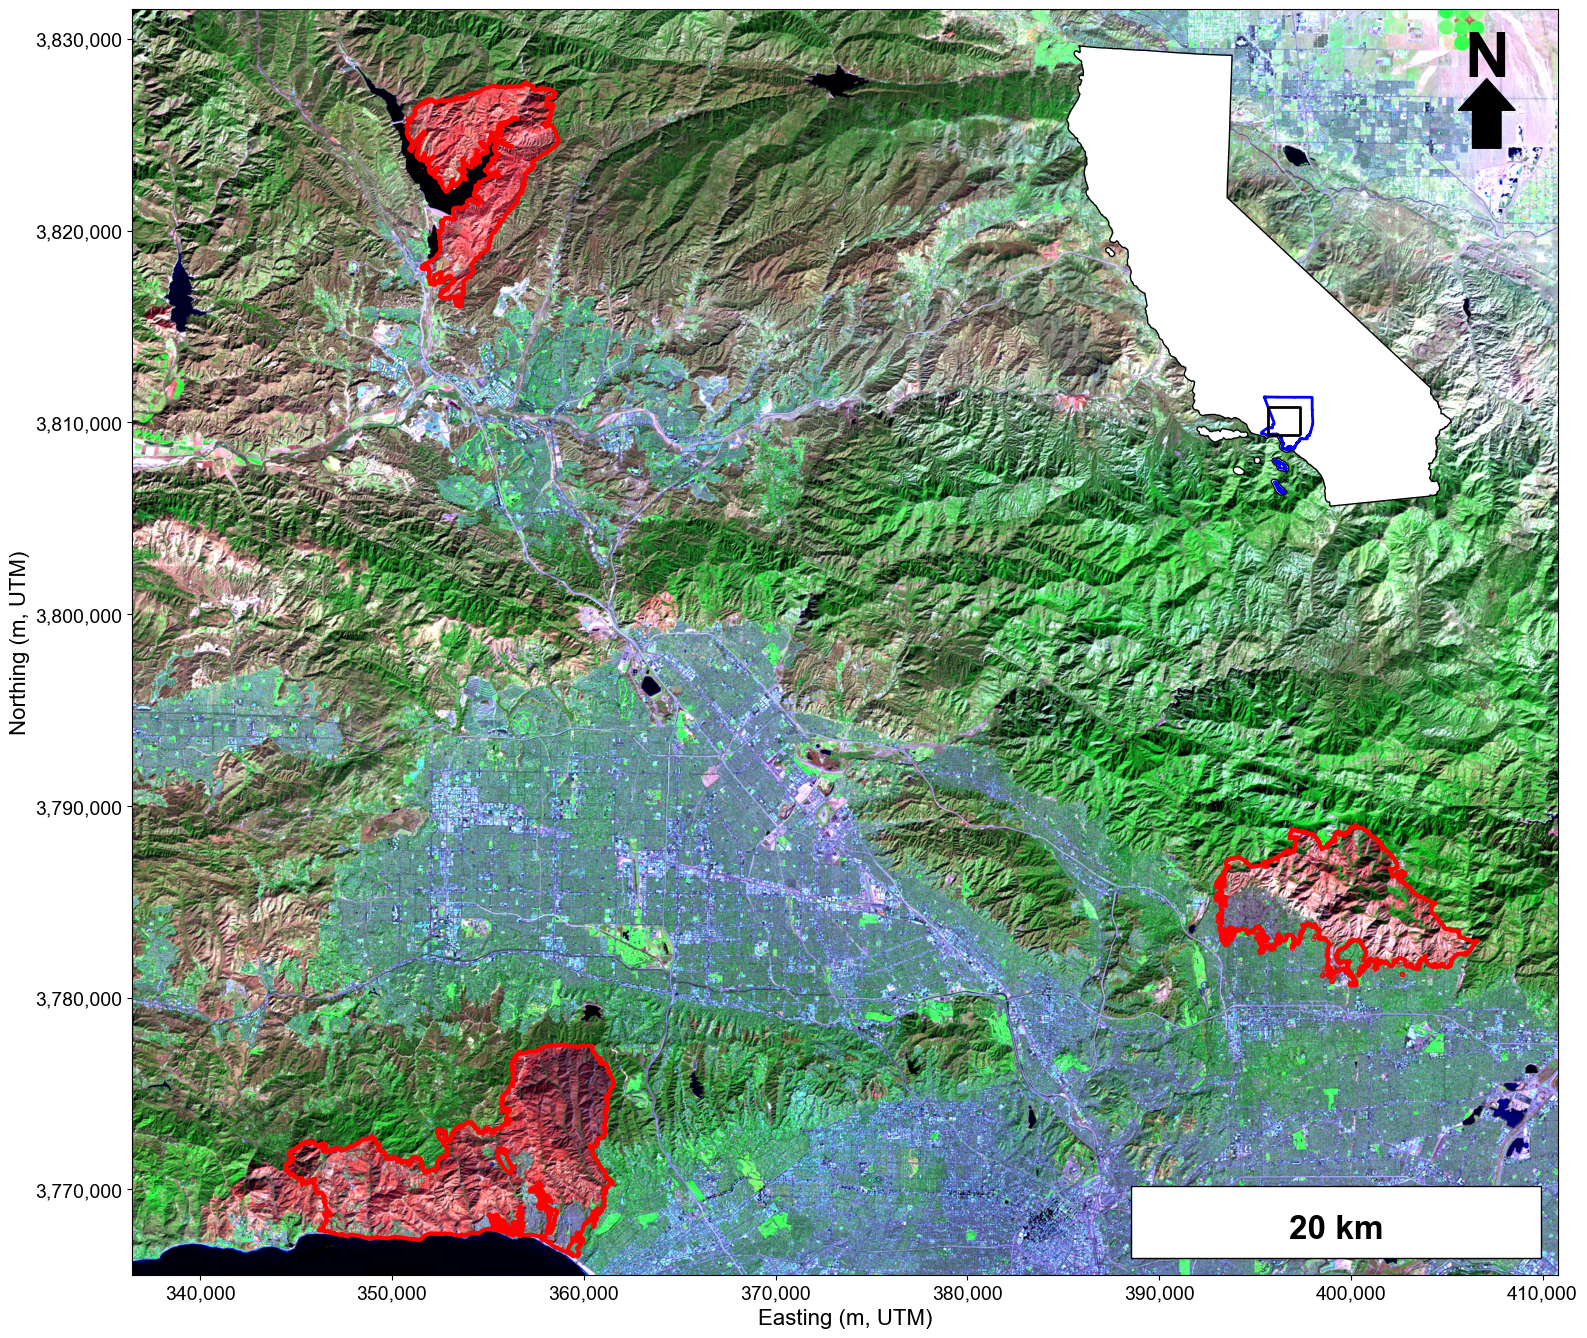

In [2]:
import rasterio
from rasterio.plot import show
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from shapely.geometry import box
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib.font_manager import FontProperties
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="pyogrio.geopandas")

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"


# --- File paths ---
tif_path = "/Volumes/GEOG/EMIT_ECOSTRESS_wildfires/figures/L8_20250223_B753_roi2.tif"
shapefile_paths = ["/Volumes/GEOG/EMIT_ECOSTRESS_wildfires/data/Hughes/WFIGS_Interagency_Perimeters_YearToDate_766592061499072023/Perimeters.shp", "/Volumes/GEOG/EMIT_ECOSTRESS_wildfires/data/Palisades/palisades_WFIGS_Interagency_Perimeters_3052577321033056274/Perimeters.shp", "/Volumes/GEOG/EMIT_ECOSTRESS_wildfires/data/Eaton/WFIGS_Interagency_Perimeters_YearToDate_6432345315956995972/Perimeters.shp"]
california_shapefile = "/Volumes/GEOG/EMIT_ECOSTRESS_wildfires/figures/CA_shp/ca_state/CA_State.shp"  
county_shapefile = "/Volumes/GEOG/EMIT_ECOSTRESS_wildfires/figures/CA_shp/LAcounty/County_Boundary/County_Boundary.shp"


# Load raster
with rasterio.open(tif_path) as src:
    bounds = src.bounds
    raster_crs = src.crs

    # Main plot
    fig, ax = plt.subplots(figsize=(16, 16))
    show(src, ax=ax)
    ax.set_aspect('equal')

    # Add shapefiles
    for shp in shapefile_paths:
        gdf = gpd.read_file(shp)
        if gdf.crs != raster_crs:
            gdf = gdf.to_crs(raster_crs)
        gdf.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=3)

    # Add scalebar
    from matplotlib.font_manager import FontProperties
    from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

    # Create the scalebar
    scalebar = AnchoredSizeBar(
        transform=ax.transData,
        size=20000,                        # bar length in map units
        label='20 km',
        loc='lower right',
        pad=0.4,
        color='white',                     # bar color
        frameon=True,                      # frame for visibility
        borderpad=0.5,
        size_vertical=600,
        fontproperties=FontProperties(family='Arial', weight='bold', size=24)
    )
    
    # Set label text color manually
    # txt_label is a TextArea object -> we get the actual text object from it
    scalebar._box._children[1]._text.set_color('black')
    
    # Add to axis
    ax.add_artist(scalebar)
    

    # Inset axes for context map
    axins = inset_axes(ax, width="40%", height="40%", loc='upper right', borderpad=1)

    # Load and plot California outline
    ca = gpd.read_file(california_shapefile)
    if ca.crs != raster_crs:
        ca = ca.to_crs(raster_crs)
    ca.plot(ax=axins, facecolor='white', edgecolor='black')

    # Load and plot county boundary in purple
    county_gdf = gpd.read_file(county_shapefile)
    if county_gdf.crs != raster_crs:
        county_gdf = county_gdf.to_crs(raster_crs)
    county_gdf.plot(ax=axins, facecolor='none', edgecolor='blue', linewidth=2)

    # Draw the raster extent on the inset
    raster_box = gpd.GeoDataFrame(geometry=[box(*bounds)], crs=raster_crs)
    raster_box.plot(ax=axins, facecolor='none', edgecolor='black', linewidth=2)

    axins.set_axis_off()


# North label
ax.annotate(
    'N',
    xy=(0.95, 0.96),            
    xycoords='axes fraction',
    ha='center', va='center',
    fontsize=45, fontweight='bold', color='black'
)

arrow = mpatches.FancyArrow(
    0.95, 0.89,                 # Start position (x, y)
    0, 0.030,                  
    width=0.020,
    head_width=0.040,
    head_length=0.025,
    transform=ax.transAxes,
    color='black'
)
ax.add_patch(arrow)

ax.ticklabel_format(useOffset=False, style='plain', axis='both')
ax.tick_params(labelsize=14)

import matplotlib.ticker as mticker
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{y:,.0f}'))

ax.set_xlabel("Easting (m, UTM)", fontsize=16)
ax.set_ylabel("Northing (m, UTM)", fontsize=16)

plt.tight_layout()

plt.savefig("/Users/megan/Desktop/figures-rfr-lafires/Figure1_studyareamap.png", dpi=300, bbox_inches='tight')

plt.show()